In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn 
import warnings
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,Input

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [9]:
dataset = r"C:\Users\hp\Downloads\utkcropped"


In [10]:
img_path=[]
age_label=[]
gender_label=[]
for filename in tqdm(os.listdir(dataset)):
    img_paths=os.path.join(dataset,filename)
    temp=filename.split('_')
    age=int(temp[0])
    gender=int(temp[1])
    img_path.append(img_paths)
    age_label.append(age)
    gender_label.append(gender)

  0%|          | 0/23709 [00:00<?, ?it/s]

In [11]:
df=pd.DataFrame()
df['image'],df['Age'],df['Gender']=img_path,age_label,gender_label




In [13]:
gender_dicr={0:'Male',1:'Female'}

In [ ]:
def extract_feature(img_paths):
    features=[]
    for img_paths in tqdm(img_path):
     img=load_img(img_paths,color_mode="grayscale")
     img=img.resize((96,96),Image.Resampling.LANCZOS)
     img=np.array(img)
     features.append(img)
     
    features=np.array(features)  
    features=features.reshape(len(features),128,128,1)
    return features

In [17]:
x=extract_feature(df['image'])

  0%|          | 0/23709 [00:00<?, ?it/s]

In [18]:
x.shape

(23709, 96, 96, 1)

In [19]:
x = x.astype("float32") / 255.0


In [20]:
y_gender=np.array(df['Gender'])
y_age=np.array(df['Age'])

In [ ]:
input_shape=(128,128,1)

In [22]:

inputs = Input(shape=input_shape)

conv_1 = Conv2D(32, (3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D((2,2))(conv_1)

conv_2 = Conv2D(64, (3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D((2,2))(conv_2)

conv_3 = Conv2D(128, (3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D((2,2))(conv_3)

conv_4 = Conv2D(256, (3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D((2,2))(conv_4)

flat = Flatten()(maxp_4)

dense_1 = Dense(256, activation='relu')(flat)
dense_2 = Dense(256, activation='relu')(flat)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

gender_output = Dense(1, activation='sigmoid', name='gender_output')(dropout_1)
age_output = Dense(1, activation='linear', name='age_output')(dropout_2)

model = Model(inputs=inputs, outputs=[gender_output, age_output])
model.compile(
    optimizer='adam',
    loss={
        'gender_output': 'binary_crossentropy',
        'age_output': 'mae'
    },
    metrics={
        'gender_output': ['accuracy'],
        'age_output': ['mae']
    }
)





In [ ]:
history=model.fit(x=x,y=[y_gender,y_age],epochs=20,batch_size=32,validation_split=0.3)

Epoch 1/5
519/519 ━━━━━━━━━━━━━━━━━━━━ 359s 653ms/step - age_output_loss: 8.7328 - age_output_mae: 8.7334 - gender_output_accuracy: 0.5073 - gender_output_loss: 0.6991 - loss: 9.4325 - val_age_output_loss: 32.7172 - val_age_output_mae: 32.7795 - val_gender_output_accuracy: 0.3897 - val_gender_output_loss: 0.6955 - val_loss: 33.4750
Epoch 2/5
519/519 ━━━━━━━━━━━━━━━━━━━━ 304s 585ms/step - age_output_loss: 7.1051 - age_output_mae: 7.1060 - gender_output_accuracy: 0.6534 - gender_output_loss: 0.6012 - loss: 7.7072 - val_age_output_loss: 27.1382 - val_age_output_mae: 27.1912 - val_gender_output_accuracy: 0.7457 - val_gender_output_loss: 0.5265 - val_loss: 27.7185
Epoch 3/5
519/519 ━━━━━━━━━━━━━━━━━━━━ 238s 457ms/step - age_output_loss: 5.8715 - age_output_mae: 5.8704 - gender_output_accuracy: 0.7803 - gender_output_loss: 0.4638 - loss: 6.3344 - val_age_output_loss: 27.1190 - val_age_output_mae: 27.1825 - val_gender_output_accuracy: 0.7947 - val_gender_output_loss: 0.4439 - val_loss: 27.626

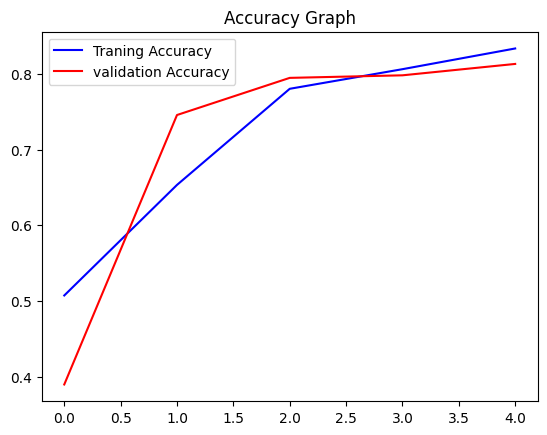

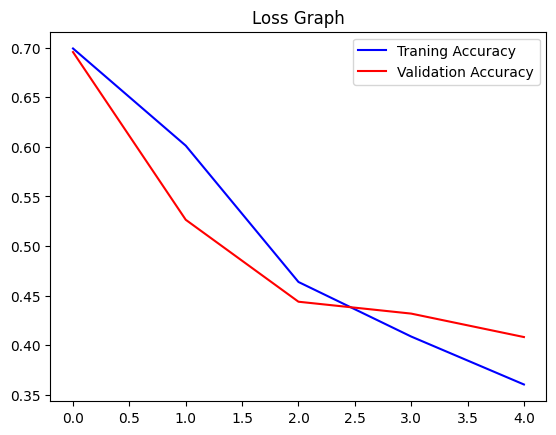

In [28]:
account=history.history['gender_output_accuracy']
val_acc=history.history['val_gender_output_accuracy']
epochs=range(len(account))
plt.plot(epochs,account,'b',label='Traning Accuracy')
plt.plot(epochs,val_acc,'r',label='validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history.history['gender_output_loss']
val_loss=history.history['val_gender_output_loss']

plt.plot(epochs,loss,'b',label='Traning Accuracy')
plt.plot(epochs,val_loss,'r',label='Validation Accuracy')
plt.title('Loss Graph')
plt.legend()
plt.show()


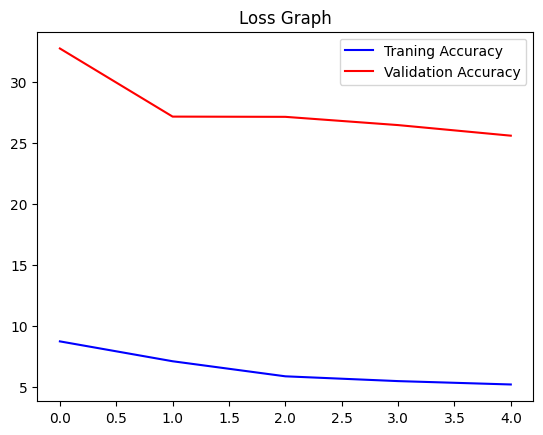

In [29]:
loss=history.history['age_output_loss']
val_loss=history.history['val_age_output_loss']
epochs=range(len(loss))

plt.plot(epochs,loss,'b',label='Traning Accuracy')
plt.plot(epochs,val_loss,'r',label='Validation Accuracy')
plt.title('Loss Graph')
plt.legend()
plt.show()

original gender Male origina age: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Predicted gender Female Predicted Age: 24


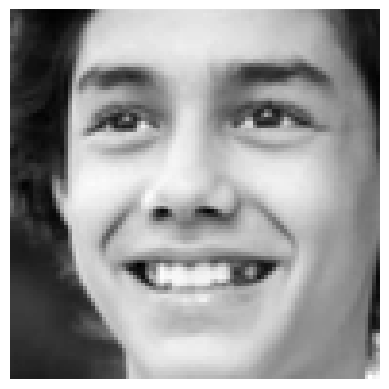

In [ ]:
imag_ind=100
print("original gender",gender_dicr[y_gender[imag_ind]],"origina age:",y_age[imag_ind])
predict=model.predict(x[imag_ind].reshape(1,128,128,1))
prediction_gender=gender_dicr[round(predict[0][0][0])]
prediction_age=round(predict[1][0][0])
print("Predicted gender",prediction_gender,'Predicted Age:',prediction_age)
plt.axis('off')
plt.imshow(x[imag_ind].reshape(128,128),cmap='gray');

original gender Male origina age: 27
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted gender Male Predicted Age: 29


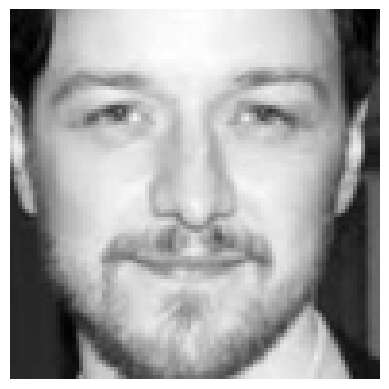

In [ ]:
imag_ind=8000
print("original gender",gender_dicr[y_gender[imag_ind]],"origina age:",y_age[imag_ind])
predict=model.predict(x[imag_ind].reshape(1,128,128,1))
prediction_gender=gender_dicr[round(predict[0][0][0])]
prediction_age=round(predict[1][0][0])
print("Predicted gender",prediction_gender,'Predicted Age:',prediction_age)
plt.axis('off')
plt.imshow(x[imag_ind].reshape(128,128),cmap='gray');

In [ ]:
imgmy=r"H:\selfie\photo.jpg"
myimage=load_img(imgmy,color_mode='grayscale',target_size=(128,128,))
myimagarry=np.array(myimage)
myimagarry=myimagarry.astype("float32")/255.0
myimagarry=myimagarry.reshape(1,128,128,1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Predicted gender: Female
Predicted age: 20


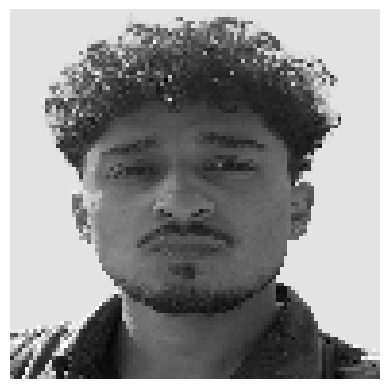

In [ ]:
predict = model.predict(myimagarry)

prediction_gender = gender_dicr[round(predict[0][0][0])]
prediction_age = round(predict[1][0][0])

print("Predicted gender:", prediction_gender)
print("Predicted age:", prediction_age)

plt.axis('off')
plt.imshow(myimagarry.reshape(128,128), cmap='gray')
plt.show()



In [ ]:
# Creating a function for this whole process
def automate_imgprocc(imag_path,model,gender_dicr):
    img=load_img(imag_path,color_mode='grayscale',target_size=(96,96))
    image_array=np.array(img)
    image_array=image_array.astype("float32")/255.0
    image_array=image_array.reshape(1,128,128,1)
    newprediction=model.predict(image_array)
    newpredict_gender=gender_dicr[round(newprediction[0][0][0])]
    newpredict_age=round(newprediction[0][0][0])
    print("Predicted gender:",newpredict_gender)
    print("Predicted_age:",newpredict_age)
    plt.axis('off')
    plt.imshow(image_array.reshape(128,128),cmap='gray')
    plt.show()
    return newpredict_age,newpredict_gender
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted gender: Female
Predicted_age: 1


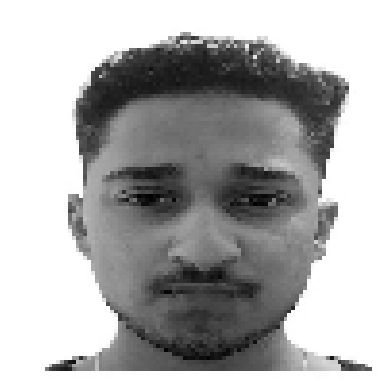

(1, 'Female')

In [48]:
automate_imgprocc(r"H:\selfie\selife2.jpg",model,gender_dicr)